In [2]:
# %% [code]
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 파일 경로를 자신의 경로에 맞게 수정하세요.
pickle_path = 'Globo/item_embedding.pickle'

# 임베딩 파일 불러오기: {item_id: embedding (numpy array)}
with open(pickle_path, 'rb') as f:
    item_embeddings = pickle.load(f)

# 딕셔너리에서 item_id와 임베딩값을 추출
item_ids = list(item_embeddings.keys())
embeddings = np.array([item_embeddings[item_id] for item_id in item_ids])  # shape: [N, D]
print("Embedding shape:", embeddings.shape)


Embedding shape: (364046, 384)


Mean norm: 1.0
Std norm: 3.5499777e-08
Min norm: 0.9999999
Max norm: 1.0000001


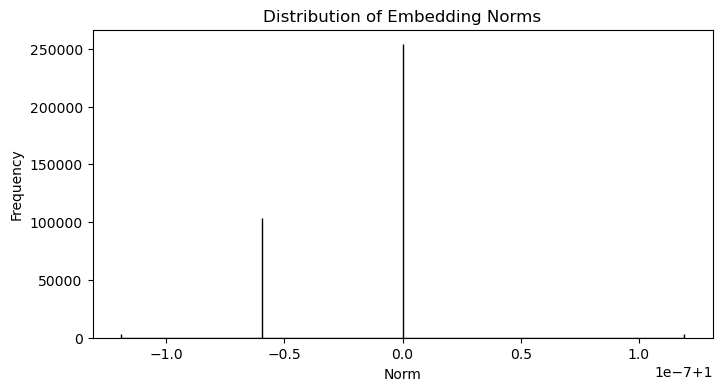

In [3]:

# %% [code]
# 각 임베딩 벡터의 norm 분포 확인
norms = np.linalg.norm(embeddings, axis=1)
print("Mean norm:", np.mean(norms))
print("Std norm:", np.std(norms))
print("Min norm:", np.min(norms))
print("Max norm:", np.max(norms))

plt.figure(figsize=(8, 4))
plt.hist(norms, bins=50, color='skyblue', edgecolor='k')
plt.title("Distribution of Embedding Norms")
plt.xlabel("Norm")
plt.ylabel("Frequency")
plt.show()


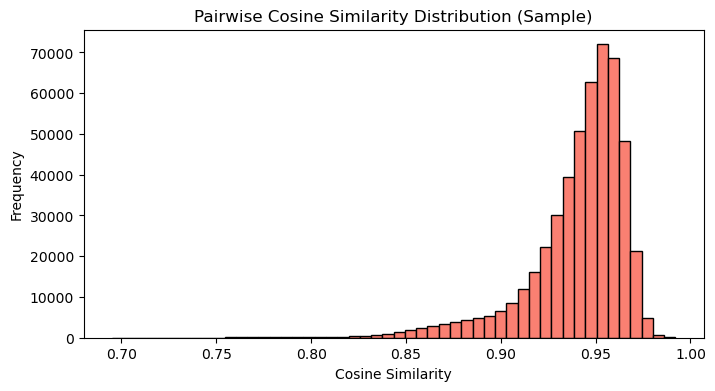

In [4]:

# %% [code]
# 임의의 샘플(예: 최대 1000개)에 대해 pairwise cosine similarity 분포 확인
n_sample = min(1000, embeddings.shape[0])
sample_indices = np.random.choice(embeddings.shape[0], size=n_sample, replace=False)
sample_embeddings = embeddings[sample_indices]

# 각 임베딩을 정규화하여 cosine similarity 계산
sample_embeddings_norm = sample_embeddings / np.linalg.norm(sample_embeddings, axis=1, keepdims=True)
cosine_sim_matrix = np.dot(sample_embeddings_norm, sample_embeddings_norm.T)

# 대각원소를 제외한 상삼각 부분 추출
triu_indices = np.triu_indices_from(cosine_sim_matrix, k=1)
cosine_sim_values = cosine_sim_matrix[triu_indices]

plt.figure(figsize=(8, 4))
plt.hist(cosine_sim_values, bins=50, color='salmon', edgecolor='k')
plt.title("Pairwise Cosine Similarity Distribution (Sample)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()


Whitened Embedding shape: (364046, 384)


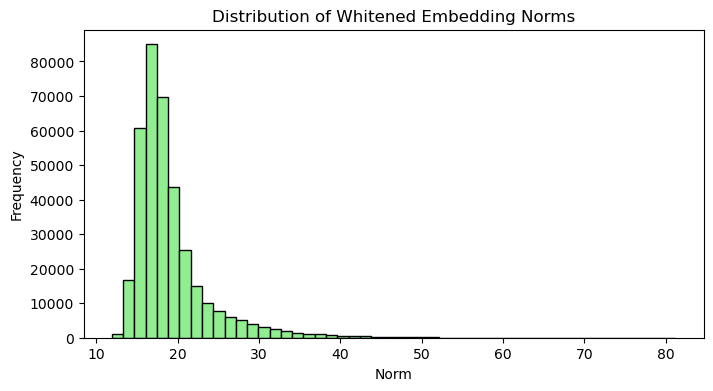

In [5]:

# %% [code]
# 만약 cosine similarity가 너무 집중되어 있다면, PCA whitening을 적용하여 spread 효과 확인
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

pca = PCA(whiten=True)
embeddings_whitened = pca.fit_transform(embeddings_scaled)
print("Whitened Embedding shape:", embeddings_whitened.shape)

# Whitening 후 norm 분포 확인
norms_whitened = np.linalg.norm(embeddings_whitened, axis=1)
plt.figure(figsize=(8, 4))
plt.hist(norms_whitened, bins=50, color='lightgreen', edgecolor='k')
plt.title("Distribution of Whitened Embedding Norms")
plt.xlabel("Norm")
plt.ylabel("Frequency")
plt.show()


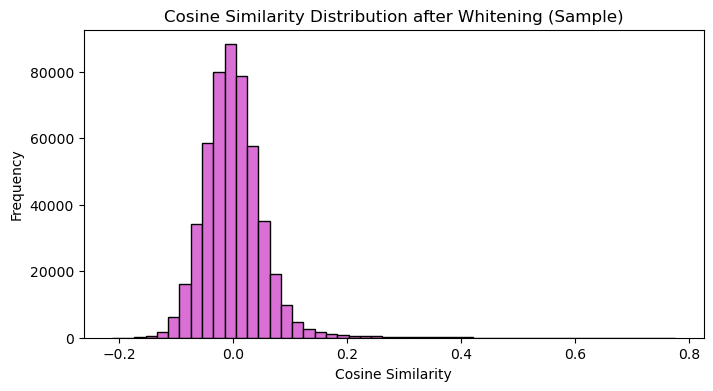

In [6]:

# %% [code]
# Whitening 후 임의 샘플에 대해 cosine similarity 다시 계산
sample_embeddings_whitened = embeddings_whitened[sample_indices]
sample_embeddings_whitened_norm = sample_embeddings_whitened / np.linalg.norm(sample_embeddings_whitened, axis=1, keepdims=True)
cosine_sim_matrix_whitened = np.dot(sample_embeddings_whitened_norm, sample_embeddings_whitened_norm.T)

triu_indices = np.triu_indices_from(cosine_sim_matrix_whitened, k=1)
cosine_sim_values_whitened = cosine_sim_matrix_whitened[triu_indices]

plt.figure(figsize=(8, 4))
plt.hist(cosine_sim_values_whitened, bins=50, color='orchid', edgecolor='k')
plt.title("Cosine Similarity Distribution after Whitening (Sample)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 입력 및 출력 파일 경로 설정
folder = 'Retail_Rocket'
input_pickle = '/item_embedding.pickle'
output_pickle = '/item_embedding_normalized.pickle'
input_pickle = folder + input_pickle
output_pickle = folder + output_pickle

# 1. 기존 item embedding 불러오기
with open(input_pickle, 'rb') as f:
    item_embeddings = pickle.load(f)

# 2. 아이템 ID와 embedding 벡터 추출
item_ids = list(item_embeddings.keys())
embeddings = np.array([item_embeddings[item_id] for item_id in item_ids])  # shape: [N, D]
print("Original embeddings shape:", embeddings.shape)

# 3. StandardScaler로 평균 제거 및 스케일링
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# 4. PCA Whitening 적용 (whiten=True로 각 주성분의 분산을 1로 만듦)
pca = PCA(whiten=True)
embeddings_whitened = pca.fit_transform(embeddings_scaled)
print("Whitened embeddings shape:", embeddings_whitened.shape)

# 5. 결과를 딕셔너리 형태로 재구성하여 저장
item_embeddings_whitened = {item_id: embeddings_whitened[i] for i, item_id in enumerate(item_ids)}

with open(output_pickle, 'wb') as f:
    pickle.dump(item_embeddings_whitened, f)

print(f"Normalized embeddings saved to {output_pickle}")


Original embeddings shape: (417053, 384)
Whitened embeddings shape: (417053, 384)
Normalized embeddings saved to Retail_Rocket/item_embedding_normalized.pickle
